### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt 

# File to Load (Remember to Change These)
mouse = "data/Mouse_metadata.csv"
study = "data/Study_results.csv"

# Read School and Student Data File and store into Pandas DataFrames
mouse_df = pd.read_csv(mouse)
study_df = pd.read_csv(study)

# Combine the data into a single dataset.  
merge_df = pd.merge(mouse_df, study_df, how="inner", on=["Mouse ID"])

In [114]:
%matplotlib inline

In [4]:
#view mouse data
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
#view study data
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#view merged data
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
num_mice = mouse_df['Mouse ID'].count()
print(f" The number of mice is {num_mice}")

 The number of mice is 249


In [10]:
#Find cells with duplicate mouse

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          20         54.657650           1                   1
                                                        15         53.442020           0                   1
                                                        10         49.880528           0                   1
                                                        5          47.570392           0                   1
                                                        0          45.000000           0                   1
dtype: int64

In [24]:
#print out array of duplicates
dups = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

real_dups =pd.DataFrame(dups)
real_dups

,0
0,g989


In [13]:
#Identify  all the duplicated mice ind the dataset
dups = merge_df.loc[merge_df['Mouse ID'] =='g989',:]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
#clean data by dropping dups

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(dups)==False]


In [26]:
#number of mice in new dataframe
rem_mice=clean_df["Mouse ID"].value_counts()
new_mice = len(rem_mice)
new_mice


248

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mean
descr_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#median
descr_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
#variance
descr_var = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
#standard deviation
descr_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
#standard error of the mean
descr_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

#create a data table in the form of 
Table1_df = pd.DataFrame({
    "Mean Tumor Volume": descr_mean,
    "Median Tumor Volume": descr_median,
    "Tumor Volume Variance": descr_var,
    "Tumor Volume Std. Dev": descr_std,
    "Tumor Volume Std. Err": descr_sem,  
    
    
})
Table1_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# used function .agg() on the Tumor panda series and applied the aggregation functions required
Table2_df = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Table2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, 'Number of Unique Mice Tested')

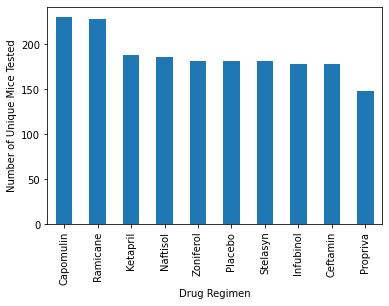

In [115]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

pan_plot = clean_df['Drug Regimen'].value_counts().plot.bar()

# Set label for X  
pan_plot.set_xlabel("Drug Regimen")
# Set label for Y  
pan_plot.set_ylabel("Number of Unique Mice Tested")



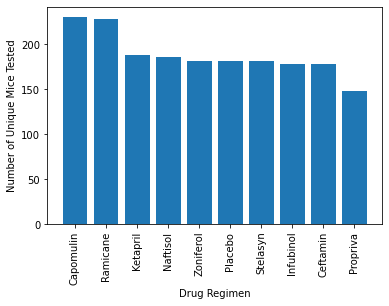

In [116]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
pan_plot = clean_df['Drug Regimen'].value_counts()
Drug_reg = pan_plot.index.values
Num_mice = pan_plot.values

plt.bar(Drug_reg, Num_mice)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Observations:
#There were more mice who received the anti-cancer agents of Capomulin and Ramicane,
#when compared to the other anti-cancer agens. Propriva has the lowest number
#of mice.

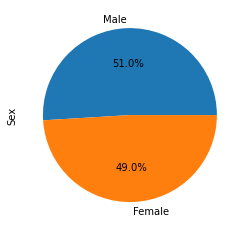

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = clean_df['Sex'].value_counts()
pie_df.plot.pie(autopct="%1.1f%%")
plt.show()

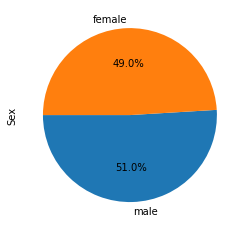

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df, labels=('male','female'), startangle=180, autopct="%1.1f%%")
plt.ylabel('Sex')
#plt.tight_layout()
plt.show()

In [ ]:
#Observations:
#The sample was relatively proportional with males and females;
#albeit slightly more males

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug4 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse

max_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_Timepoint'})
max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time = pd.merge(clean_df, max_df, how='right', on='Mouse ID')
max_time.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,b447,Ceftamin,Male,2,30,0,45.0,0,0
1,x226,Ceftamin,Male,23,28,0,45.0,0,0
2,f932,Ketapril,Male,15,29,0,45.0,0,0
3,x336,Naftisol,Female,4,29,0,45.0,0,0
4,l872,Placebo,Male,19,30,0,45.0,0,0


In [98]:
# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
values = []

# Put treatments into a list for for loop (and later for plot labels)

for drug in drugs:
    #identify specific drug
    spec_drug = max_time.loc[max_time['Drug Regimen'] == drug]
    
    #Identify last timepoint for each drug
    final_tp = spec_drug.loc[spec_drug ['Timepoint'] == spec_drug['Max_Timepoint']]
    
    #create series of volumes and add those values using append
    volume = final_tp['Tumor Volume (mm3)']
    values.append(volume)
    
   
    #Determine quartiles, IQR, and lower and upper bounds
    
    quartile = volume.quantile([0.25, 0.5, 0.75])
    LCL = quartile[0.25] #first 25
    UCL = quartile[0.75] #last 25
    IQR = UCL - LCL #interquartile range
    LCL_out = LCL - (1.5*IQR) #lower bounds
    UCL_out = UCL + (1.5*IQR) #upper bounds
    print(f'The Interquartile Range for {drug} is {IQR}')
    print(f'Lower bound for {drug} is {LCL_out}')
    print(f'Upper bound for {drug} is {UCL_out}')
    #statement to identify outliers
    outlier = (volume.loc[(final_tp['Tumor Volume (mm3)'] >= UCL_out) | 
                                        (final_tp['Tumor Volume (mm3)'] <= LCL_out)]).count()
    print(f'{regimen} potential outliers: {outlier}')
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

The Interquartile Range for Capomulin is 7.781863460000004
Lower bound for Capomulin is 20.70456164999999
Upper bound for Capomulin is 51.83201549
Ceftamin potential outliers: 0
The Interquartile Range for Ramicane is 9.098536719999998
Lower bound for Ramicane is 17.912664470000003
Upper bound for Ramicane is 54.30681135
Ceftamin potential outliers: 0
The Interquartile Range for Infubinol is 11.477135160000003
Lower bound for Infubinol is 36.83290494999999
Upper bound for Infubinol is 82.74144559000001
Ceftamin potential outliers: 1
The Interquartile Range for Ceftamin is 15.577752179999997
Lower bound for Ceftamin is 25.355449580000002
Upper bound for Ceftamin is 87.66645829999999
Ceftamin potential outliers: 0


In [ ]:
#Observations:
#Above we report the interquartile ranges, and the upper and lower bounds for the 4 anti-cancer agents.
#Based on our analysis, we identified 1 values that was outside the lower and upper bounds.

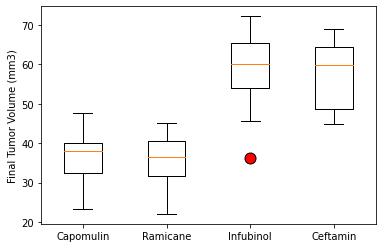

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#highlight potential outliers - (for visability stack overflow)
flierprops = dict(marker='o', markerfacecolor='r', markersize=11, markeredgecolor='black')

#create bloxplot with outlier detector and labels
plt.boxplot(values, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


In [ ]:
#Observations:
#Based on the bivariate blox plots above, median tumor volumes and confidence, it can be
#spculated that Caomulin and Ramicane performed better than the remaining
#anti-cancer agents. There was little overlap of confidence interventions
#indicating that differences in the value may be approaching statistical significance.
#However, statistical significance can not be determined without the proper test.

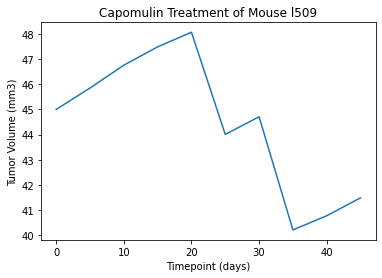

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#identify mouse based on starter key
micel509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']

#specify the variables for the graph
x= micel509['Timepoint']
y=micel509['Tumor Volume (mm3)']

#Plot a line for timepoint by tumor volume
plt.plot(x,y)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

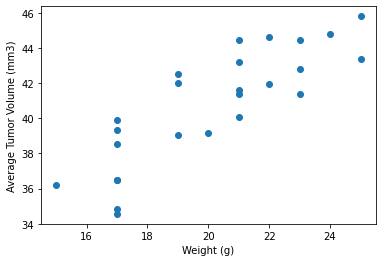

In [137]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#create the dataframe focused on specific drug
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
#because dataframe is boolean, need random values----here average values is specified
cap_avg = capomulin_df.groupby(['Mouse ID']).mean()

#specify x and y for graph
x = cap_avg['Weight (g)']
y = cap_avg['Tumor Volume (mm3)']

plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

#print out a histogram of average weight
#hist =x.hist() - this distribution is not normal


In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as stats
Corr_wt_avg= round(stat.pearsonr(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])[0], 2)

print(f'The correlation between mouse weight and the average tumor volume is {Corr_wt_avg}')

The correlation between mouse weight and the average tumor volume is 0.84


In [139]:
#Calculate Regression model
reg=stats.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
reg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

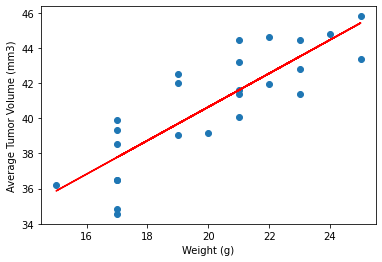

In [144]:
#regression plot
x = cap_avg['Weight (g)']
y = cap_avg['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, std_err = stats.linregress(x, y)

#estimate regression line
line = (slope*x) + intercept

#plot regression line with scatterplot
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#prints regression line
plt.plot(x,line, color='r')
plt.show()
#regression line
 

In [ ]:
# observations
#There is a strong linear relationship between weight and average tumor volume,
#which is consistant meta-analyses and review studies that indicate that
#weight and particuarly increased ones risk for 13 different cancers.